In [501]:
import requests
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import plotly.express as px
import json

In [587]:
q = pd.read_csv('cr.csv')

In [588]:
colnam = q.iloc[4]
q.columns = colnam
q = q[5:]
colnam = q.iloc[4]
q = q.drop(['Country Name','Country Code'], axis=1).reset_index(drop=True)  # remmueve columnas y pone el indedice en zero

In [103]:
#cond = q['Indicator Name'] == 'Exports of goods and services (% of GDP)'#
#q[cond]

In [105]:
#cond = q['Indicator Name'] == 'Exports of goods and services (BoP, current US$)'
#q[cond]

In [559]:
cond = q['Indicator Name'] == 'Exports of goods and services (BoP, current US$)'
exports_goods_services = q[cond]
exports_goods_services = exports_goods_services.dropna(axis='columns')
exports_goods_services = exports_goods_services.iloc[0,4:]
exports_goods_services = exports_goods_services.astype('int64')


In [154]:
#plt.plot(exports_goods_services)

In [560]:
#exports_goods_services

Text(0.5, 1.0, 'Exports of Goods and Services')

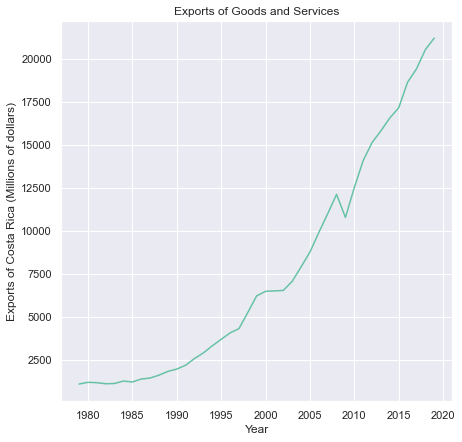

In [561]:
plt.figure(figsize=(7,7))
sns.lineplot(data=exports_goods_services/1000000)
sns.set(style='whitegrid')
sns.set_style('darkgrid')
#sns.set(font_scale = 1)
sns.set_palette('Set2')
plt.ylabel('Exports of Costa Rica (Millions of dollars)')
plt.xlabel('Year')
plt.title('Exports of Goods and Services')

In [562]:
cond = q['Indicator Name'] == 'Exports of goods and services (BoP, current US$)'
exports_goods_services = q[cond]
exports_goods_services = exports_goods_services.dropna(axis='columns')


In [563]:
cond = q['Indicator Name'] == 'Imports of goods and services (BoP, current US$)'
cond
imports_goods_services = q[cond]
imports_goods_services = imports_goods_services.dropna(axis='columns')

imports_goods_services = imports_goods_services.iloc[0,4:]
imports_goods_services = imports_goods_services.astype('int64')


Text(0.5, 1.0, 'Imports of Goods and Services')

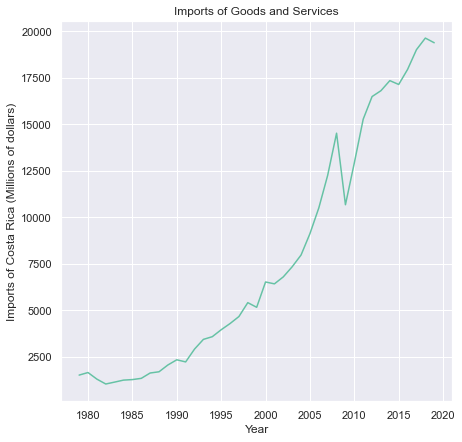

In [564]:
plt.figure(figsize=(7,7))
sns.lineplot(data=imports_goods_services/1000000)
sns.set(style='whitegrid')
sns.set_style('darkgrid')
#sns.set(font_scale = 1)
sns.set_palette('Set2')
plt.ylabel('Imports of Costa Rica (Millions of dollars)')
plt.xlabel('Year')
plt.title('Imports of Goods and Services')

curva de phillips: inflacion y desempleo
desempleo: Unemployment, total (% of total labor force) (national estimate)
inflacion: 

In [565]:
unemployment = q['Indicator Name'] == 'Unemployment, total (% of total labor force) (national estimate)'
unemployment = q[unemployment]
unemployment = unemployment.iloc[0,4:]
unemployment = unemployment.astype('float64')
unemployment_filter = unemployment.index[:] > 1991
unemployment = unemployment[unemployment_filter]

In [566]:
inflation = q['Indicator Name'] == 'Inflation, consumer prices (annual %)'
inflation = q[inflation]
inflation = inflation.iloc[0,4:]
inflation = inflation.astype('float64')
inflation_filter = inflation.index[:] > 1991
inflation = inflation[inflation_filter]


Text(0.5, 1.0, 'Phillips Curve')

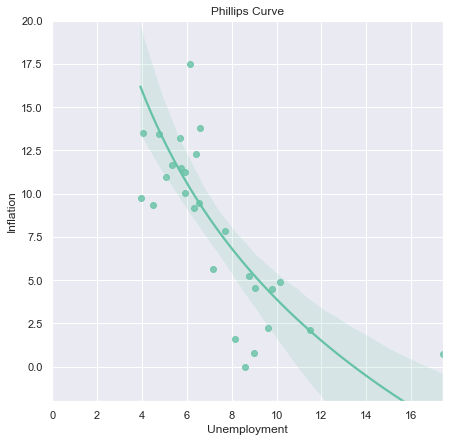

In [567]:
plt.figure(figsize=(7,7))
sns.set_style('darkgrid')
#sns.scatterplot(x=unemployment, y=inflation)
sns.regplot(x=unemployment, y=inflation, logx=True)
plt.xlim(0, None)
plt.ylim(-2,20)
plt.ylabel('Inflation')
plt.xlabel('Unemployment')
plt.title('Phillips Curve')

In [669]:
cond = q['Indicator Name'] == 'Unemployment, total (% of total labor force) (national estimate)'
unemployment_total = q[cond]
unemployment_total

4,Indicator Name,Indicator Code,1960.0,1961.0,1962.0,1963.0,1964.0,1965.0,1966.0,1967.0,...,2012.0,2013.0,2014.0,2015.0,2016.0,2017.0,2018.0,2019.0,2020.0,NaN
13,"Unemployment, total (% of total labor force) (...",SL.UEM.TOTL.NE.ZS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,9.78,8.77,9.06,9.0,8.6,8.14,9.63,11.49,17.41,NaN


In [701]:
#sns.boxplot(x=unemployment_total.iloc[0,32:].values)

In [700]:
#type(unemployment_total.iloc[0,32:].index)
values_list = unemployment_total.iloc[0,32:].values.tolist()
index_list = unemployment_total.iloc[0,32:].index.tolist()
list2 = [x for x in range(0, len(index_list))]

In [702]:
df = pd.DataFrame(values_list, columns=['Unemployment'],index=[x for x in range(0, len(index_list))])

In [ ]:
cond = q['Indicator Name'] == 'Unemployment, total (% of total labor force) (national estimate)'
unemployment_total = q[cond]
unemployment_total